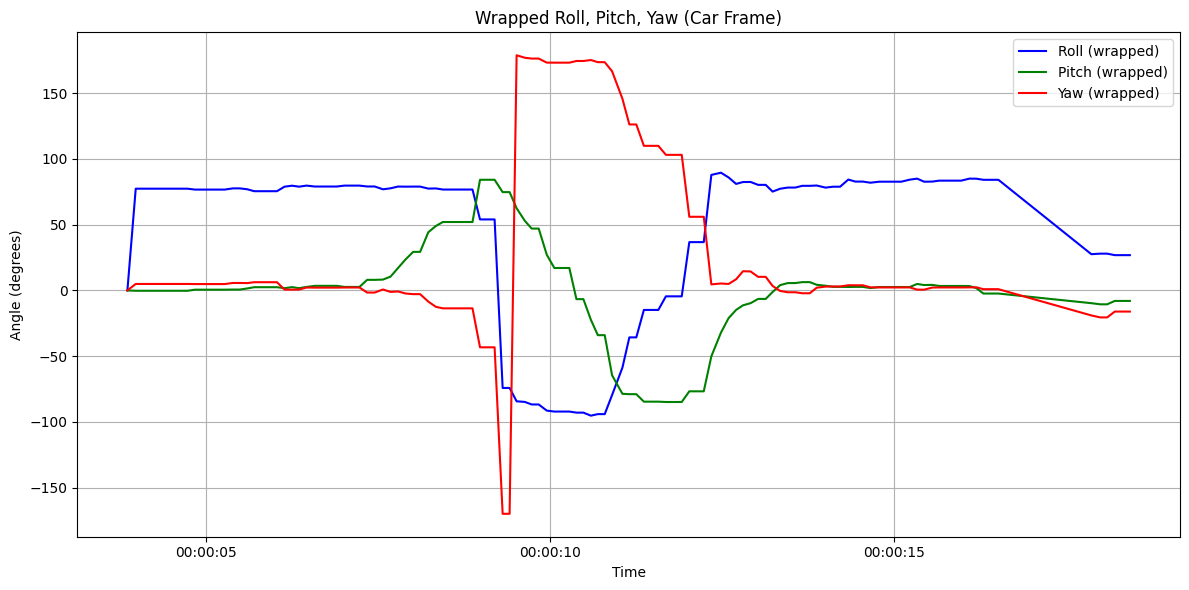

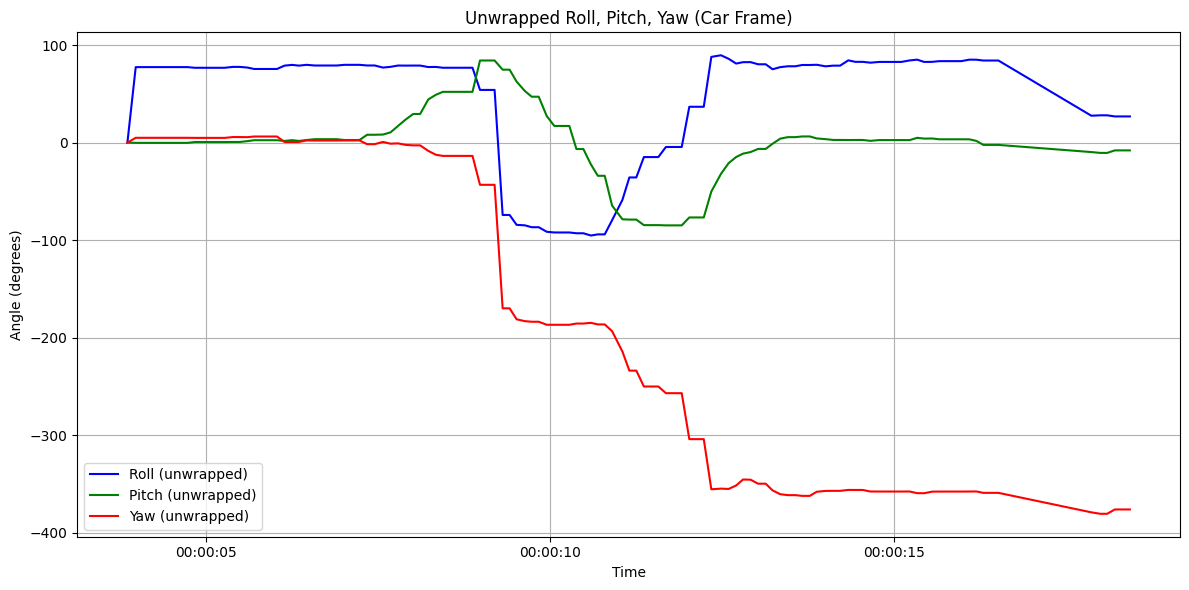

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV
file_path = "logs/log_2025-05-29_18-25-58.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Fixed quaternion mapping (IMU -> car frame)
q_fixed = np.array([0.5, -0.5, -0.5, 0.5]) # [w, x, y, z]

# Quaternion multiplication
def quat_multiply(q1, q2):
    w1, x1, y1, z1 = q1
    w2, x2, y2, z2 = q2
    w = w1*w2 - x1*x2 - y1*y2 - z1*z2
    x = w1*x2 + x1*w2 + y1*z2 - z1*y2
    y = w1*y2 - x1*z2 + y1*w2 + z1*x2
    z = w1*z2 + x1*y2 - y1*x2 + z1*w2
    return np.array([w, x, y, z])

# Apply fixed rotation to each row of quaternion
def apply_fixed_rotation(row):
    q_imu = np.array([row['qw'], row['qx'], row['qy'], row['qz']])
    q_car = quat_multiply(q_fixed, q_imu)
    return pd.Series(q_car, index=['rw_car', 'rx_car', 'ry_car', 'rz_car'])

df[['rw_car', 'rx_car', 'ry_car', 'rz_car']] = df.apply(apply_fixed_rotation, axis=1)

# Convert rotated quaternion to Euler angles (ZYX order)
def quat_to_euler(q):
    w, x, y, z = q
    roll = np.arctan2(2*(w*x + y*z), 1 - 2*(x*x + y*y))
    pitch = np.arcsin(np.clip(2*(w*y - z*x), -1.0, 1.0))
    yaw = np.arctan2(2*(w*z + x*y), 1 - 2*(y*y + z*z))
    return np.degrees([roll, pitch, yaw])

df[['CarRoll_post', 'CarPitch_post', 'CarYaw_post']] = df[['rw_car', 'rx_car', 'ry_car', 'rz_car']].apply(
    lambda row: pd.Series(quat_to_euler(row)), axis=1
)

# Plot wrapped angles
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll_post'], label='Roll (wrapped)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch_post'], label='Pitch (wrapped)', color='green')
plt.plot(df['Timestamp'], df['CarYaw_post'], label='Yaw (wrapped)', color='red')
plt.title('Wrapped Roll, Pitch, Yaw (Car Frame)')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Unwrap angles for continuous rotation
df['CarRoll_post_unwrapped'] = np.unwrap(np.radians(df['CarRoll_post'])) * 180 / np.pi
df['CarPitch_post_unwrapped'] = np.unwrap(np.radians(df['CarPitch_post'])) * 180 / np.pi
df['CarYaw_post_unwrapped'] = np.unwrap(np.radians(df['CarYaw_post'])) * 180 / np.pi

# Plot unwrapped angles
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll_post_unwrapped'], label='Roll (unwrapped)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch_post_unwrapped'], label='Pitch (unwrapped)', color='green')
plt.plot(df['Timestamp'], df['CarYaw_post_unwrapped'], label='Yaw (unwrapped)', color='red')
plt.title('Unwrapped Roll, Pitch, Yaw (Car Frame)')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


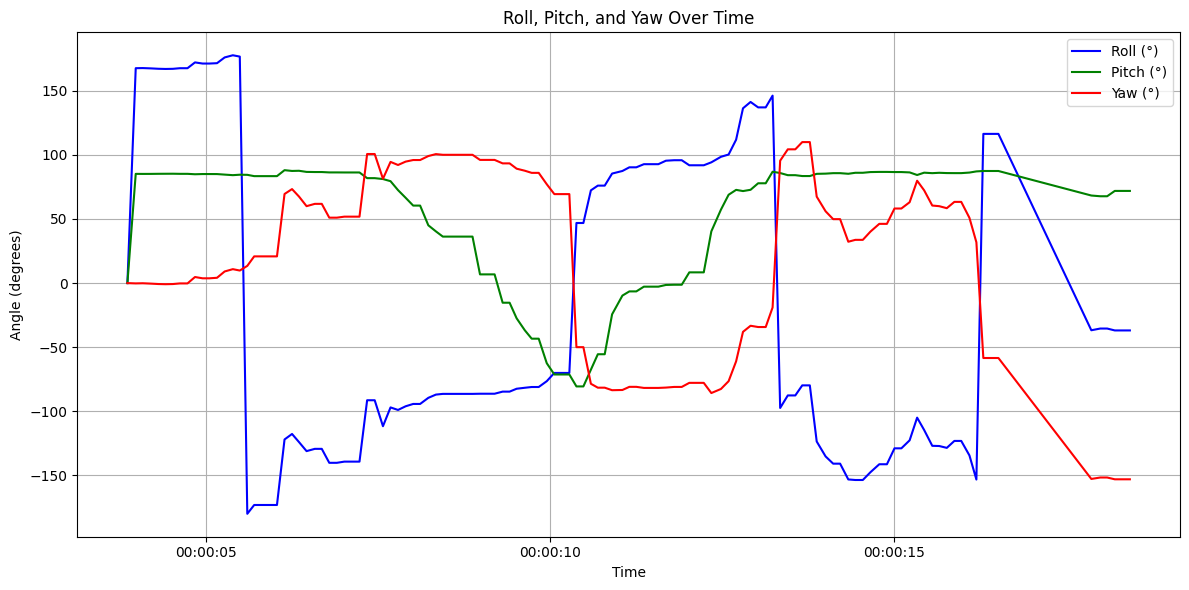

Max and Min Values:
Roll:  max = 177.69, min = -179.92
Pitch: max = 88.07, min = -80.58
Yaw:   max = 109.97, min = -153.02


In [24]:
import matplotlib.pyplot as plt
import pandas as pd

#in orientation of car, rotated 360 degrees (Roll)

# Load the data
file_path = "logs/log_2025-05-29_18-25-58.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Plot Roll, Pitch, Yaw
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll'], label='Roll (°)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch'], label='Pitch (°)', color='green')
plt.plot(df['Timestamp'], df['CarYaw'], label='Yaw (°)', color='red')

plt.title('Roll, Pitch, and Yaw Over Time')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Max and Min Values:")
print(f"Roll:  max = {df['CarRoll'].max():.2f}, min = {df['CarRoll'].min():.2f}")
print(f"Pitch: max = {df['CarPitch'].max():.2f}, min = {df['CarPitch'].min():.2f}")
print(f"Yaw:   max = {df['CarYaw'].max():.2f}, min = {df['CarYaw'].min():.2f}")




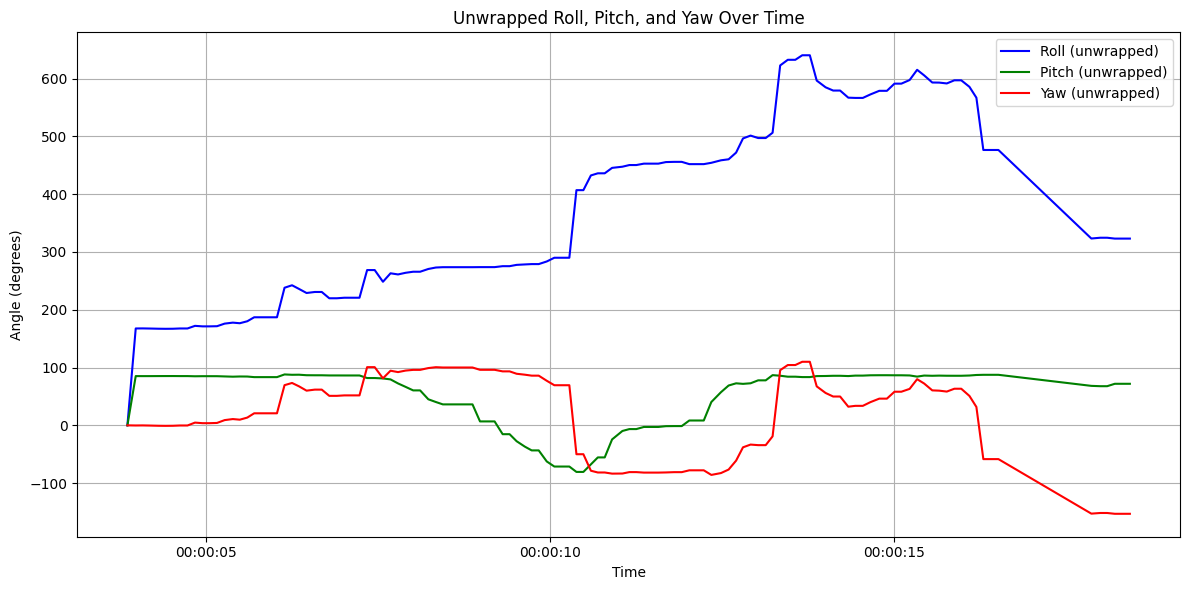

Max and Min Values (Original):
Roll:  max = 177.69, min = -179.92
Pitch: max = 88.07, min = -80.58
Yaw:   max = 109.97, min = -153.02


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
file_path = "logs/log_2025-05-29_18-25-58.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Unwrap angles
df['RollUnwrapped'] = np.unwrap(np.radians(df['CarRoll'])) * 180 / np.pi
df['PitchUnwrapped'] = np.unwrap(np.radians(df['CarPitch'])) * 180 / np.pi
df['YawUnwrapped'] = np.unwrap(np.radians(df['CarYaw'])) * 180 / np.pi

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['RollUnwrapped'], label='Roll (unwrapped)', color='blue')
plt.plot(df['Timestamp'], df['PitchUnwrapped'], label='Pitch (unwrapped)', color='green')
plt.plot(df['Timestamp'], df['YawUnwrapped'], label='Yaw (unwrapped)', color='red')

plt.title('Unwrapped Roll, Pitch, and Yaw Over Time')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Max and Min Values (Original):")
print(f"Roll:  max = {df['CarRoll'].max():.2f}, min = {df['CarRoll'].min():.2f}")
print(f"Pitch: max = {df['CarPitch'].max():.2f}, min = {df['CarPitch'].min():.2f}")
print(f"Yaw:   max = {df['CarYaw'].max():.2f}, min = {df['CarYaw'].min():.2f}")


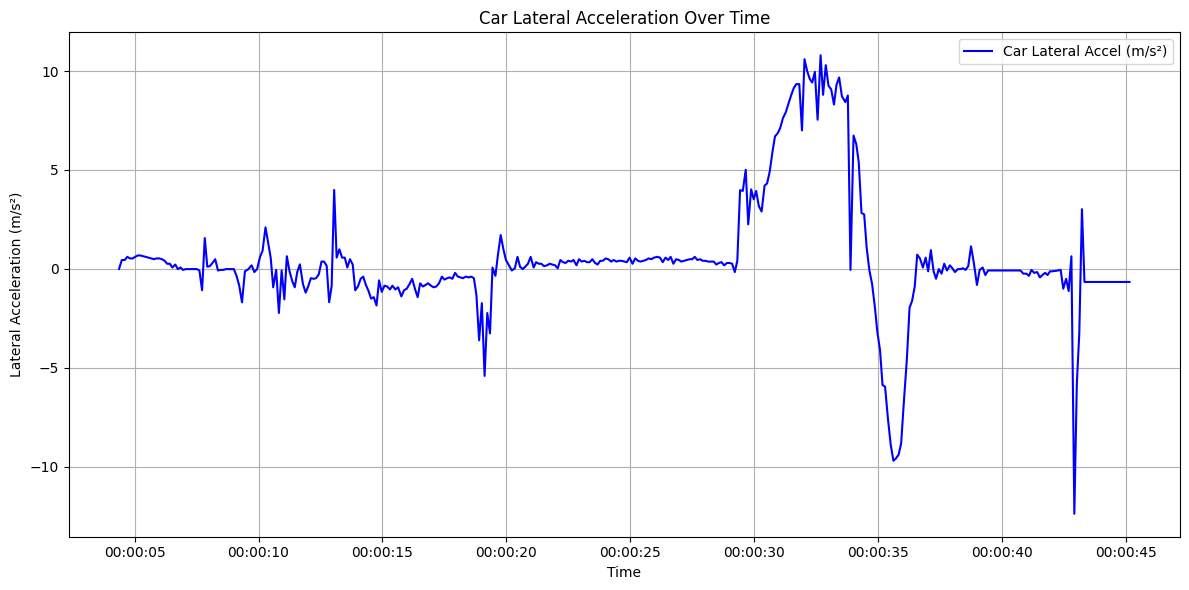

In [23]:
import matplotlib.pyplot as plt

# Sort and compute car-frame lateral accel
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['LateralAccel'], label='Car Lateral Accel (m/s²)', color='blue')

plt.title('Car Lateral Acceleration Over Time')
plt.xlabel('Time')
plt.ylabel('Lateral Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Roll 
pitch

# Pitch
roll

# yaw
yaw

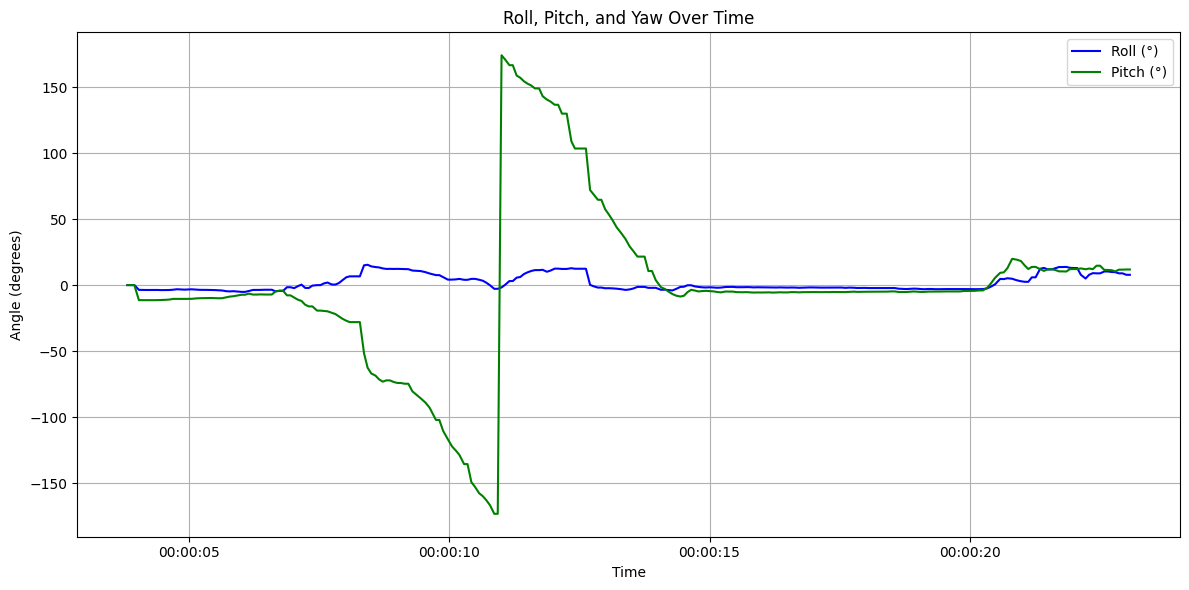

Max and Min Values:
Roll:  max = 15.38, min = -5.15
Pitch: max = 174.10, min = -173.26
Yaw:   max = 0.00, min = -111.67


In [8]:
import matplotlib.pyplot as plt
import pandas as pd

#rolled horizontally 360 degrees
# Load the data
file_path = "logs/log_2025-05-28_17-28-48.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Plot Roll, Pitch, Yaw
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll'], label='Roll (°)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch'], label='Pitch (°)', color='green')
#plt.plot(df['Timestamp'], df['CarYaw'], label='Yaw (°)', color='red')

plt.title('Roll, Pitch, and Yaw Over Time')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Max and Min Values:")
print(f"Roll:  max = {df['CarRoll'].max():.2f}, min = {df['CarRoll'].min():.2f}")
print(f"Pitch: max = {df['CarPitch'].max():.2f}, min = {df['CarPitch'].min():.2f}")
print(f"Yaw:   max = {df['CarYaw'].max():.2f}, min = {df['CarYaw'].min():.2f}")


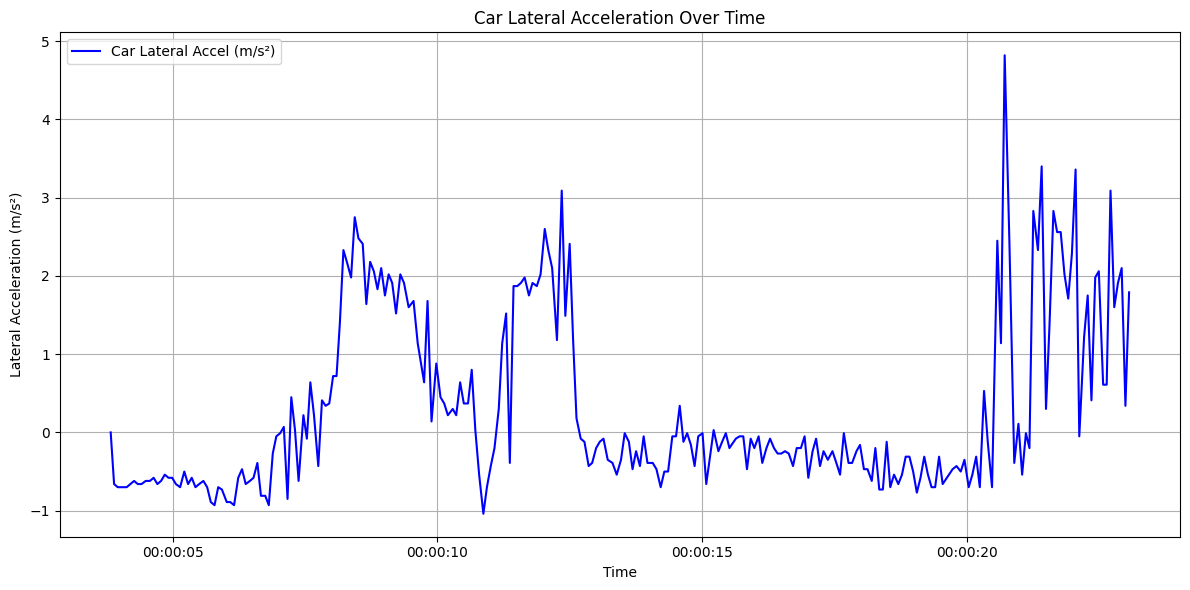

In [9]:
import matplotlib.pyplot as plt

# Sort and compute car-frame lateral accel
df = df.sort_values(by='Timestamp').reset_index(drop=True)
df['CarLateralAccel'] = -df['LatAccel']  # Flip IMU X-axis to match car lateral axis

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarLateralAccel'], label='Car Lateral Accel (m/s²)', color='blue')

plt.title('Car Lateral Acceleration Over Time')
plt.xlabel('Time')
plt.ylabel('Lateral Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

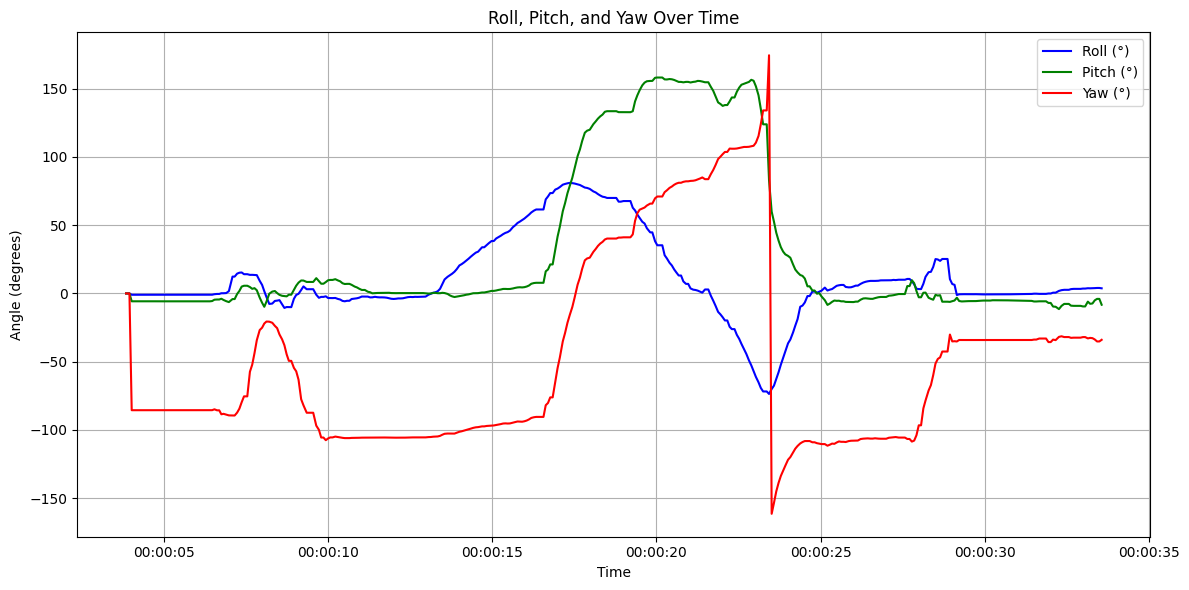

Max and Min Values:
Roll:  max = 80.98, min = -73.61
Pitch: max = 158.15, min = -11.46
Yaw:   max = 174.46, min = -161.40


In [11]:
import matplotlib.pyplot as plt
import pandas as pd

#rolled it vertically  360 degrees
# Load the data
file_path = "logs/log_2025-05-28_17-37-45.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Plot Roll, Pitch, Yaw
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll'], label='Roll (°)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch'], label='Pitch (°)', color='green')
plt.plot(df['Timestamp'], df['CarYaw'], label='Yaw (°)', color='red')

plt.title('Roll, Pitch, and Yaw Over Time')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Max and Min Values:")
print(f"Roll:  max = {df['CarRoll'].max():.2f}, min = {df['CarRoll'].min():.2f}")
print(f"Pitch: max = {df['CarPitch'].max():.2f}, min = {df['CarPitch'].min():.2f}")
print(f"Yaw:   max = {df['CarYaw'].max():.2f}, min = {df['CarYaw'].min():.2f}")


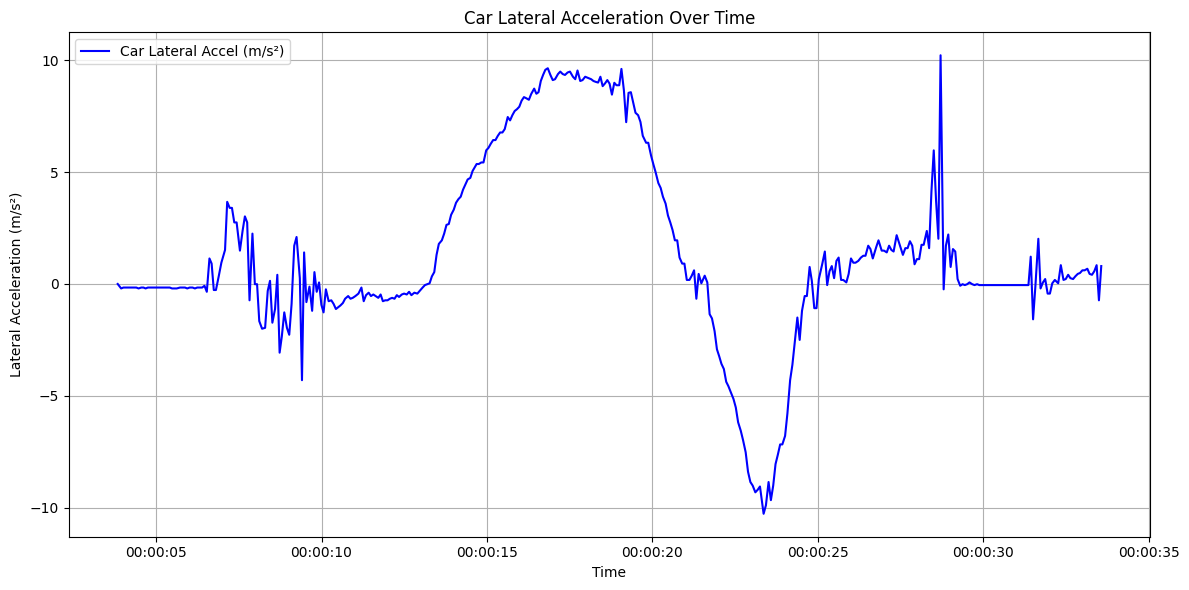

In [12]:
import matplotlib.pyplot as plt

# Sort and compute car-frame lateral accel
df = df.sort_values(by='Timestamp').reset_index(drop=True)
df['CarLateralAccel'] = -df['LatAccel']  # Flip IMU X-axis to match car lateral axis

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarLateralAccel'], label='Car Lateral Accel (m/s²)', color='blue')

plt.title('Car Lateral Acceleration Over Time')
plt.xlabel('Time')
plt.ylabel('Lateral Acceleration (m/s²)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

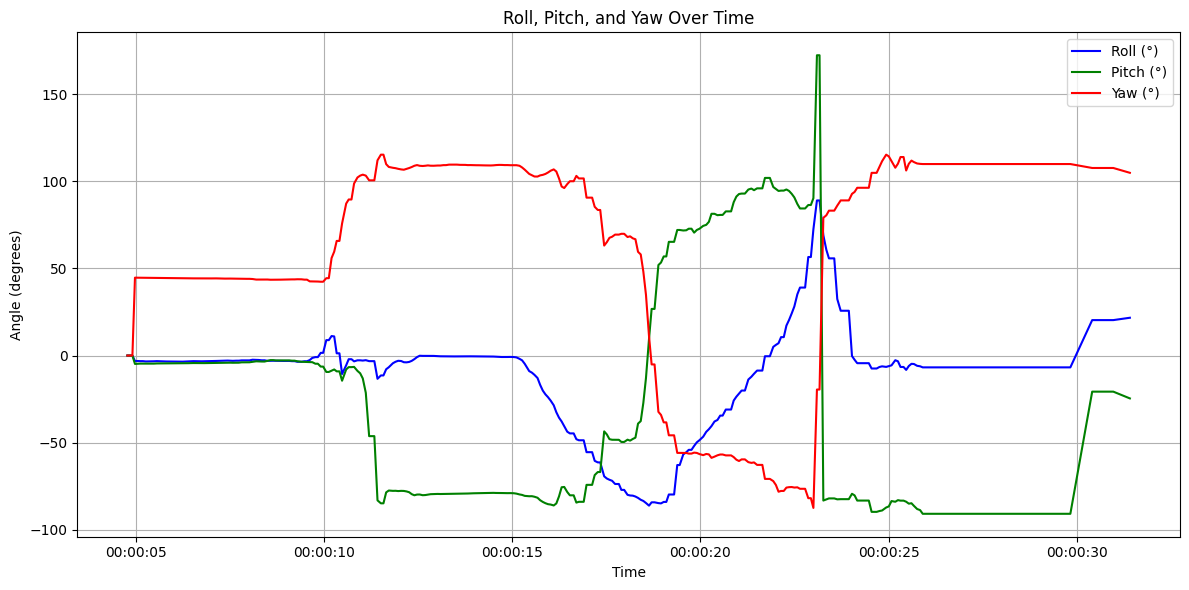

Max and Min Values:
Roll:  max = 89.00, min = -86.12
Pitch: max = 172.31, min = -90.80
Yaw:   max = 115.27, min = -87.42


In [13]:
import matplotlib.pyplot as plt
import pandas as pd

#rolled it vertically  360 degrees
# Load the data
file_path = "logs/log_2025-05-28_17-49-57.csv"
df = pd.read_csv(file_path)

# Convert and sort timestamp
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values(by='Timestamp').reset_index(drop=True)

# Plot Roll, Pitch, Yaw
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['CarRoll'], label='Roll (°)', color='blue')
plt.plot(df['Timestamp'], df['CarPitch'], label='Pitch (°)', color='green')
plt.plot(df['Timestamp'], df['CarYaw'], label='Yaw (°)', color='red')

plt.title('Roll, Pitch, and Yaw Over Time')
plt.xlabel('Time')
plt.ylabel('Angle (degrees)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Max and Min Values:")
print(f"Roll:  max = {df['CarRoll'].max():.2f}, min = {df['CarRoll'].min():.2f}")
print(f"Pitch: max = {df['CarPitch'].max():.2f}, min = {df['CarPitch'].min():.2f}")
print(f"Yaw:   max = {df['CarYaw'].max():.2f}, min = {df['CarYaw'].min():.2f}")

# rotated it vertically 360 degrees
